In [1]:
!conda acticate BioInfoLab
# !conda env list

usage: conda [-h] [-v] [--no-plugins] [-V] COMMAND ...
conda: error: argument COMMAND: invalid choice: 'acticate' (choose from 'activate', 'clean', 'commands', 'compare', 'config', 'create', 'deactivate', 'env', 'export', 'info', 'init', 'install', 'list', 'notices', 'package', 'doctor', 'repoquery', 'remove', 'uninstall', 'rename', 'run', 'search', 'update', 'upgrade')


In [2]:
import pandas as pd

In [3]:
# data = pd.read_csv('data/data1_mouse_retina/Gene_expression_table_filtered.txt', sep='\t')

# data = pd.read_csv('data/data2_mesc/Gene_expression_table_filtered.txt',sep='\t')

data = pd.read_csv('data/data3_embryo_cortex/Gene_expression_table_filtered.txt',sep='\t')

# sample_cluster_ref_filtered.txt
# data_1.head(),data_2.head(),data_3.head()

## Task 1: Filter and Normalization

In [4]:
# !pip install palantir

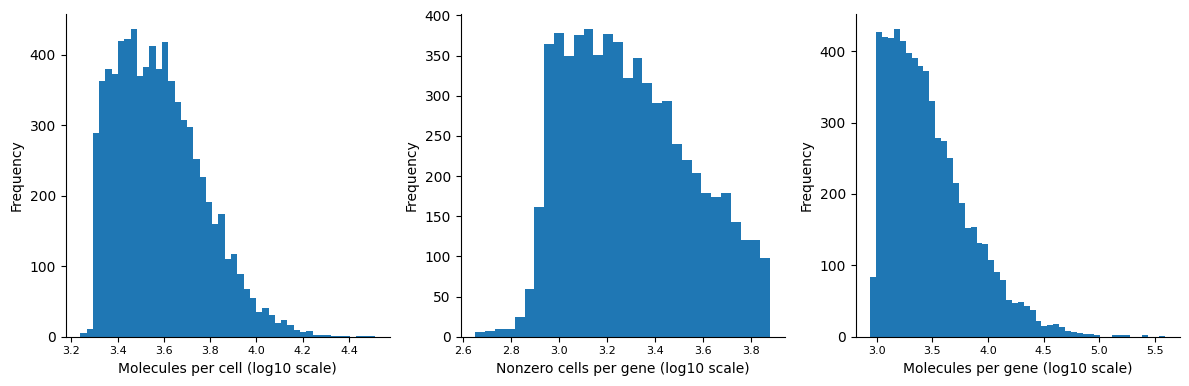

In [5]:
import palantir

fig, ax = palantir.plot.plot_molecules_per_cell_and_gene(data.T)

filtered_data = palantir.preprocess.filter_counts_data(data.T, cell_min_molecules=1000, genes_min_cells=10)


In [6]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler_minmax = MinMaxScaler()

data_minmax= pd.DataFrame(scaler_minmax.fit_transform(filtered_data), columns=filtered_data.columns)

print("Min-Max Scaling:")
data_minmax

Min-Max Scaling:


,0610007N19Rik,0610007P14Rik,0610009B22Rik,0610009D07Rik,0610009O20Rik,0610010F05Rik,0610011F06Rik,0610030E20Rik,0610037L13Rik,1110001A16Rik,...,l7Rn6,mt-Co1,mt-Cytb,mt-Nd1,mt-Nd2,mt-Nd4,mt-Nd5,mt-Nd6,mt-Rnr1,mt-Rnr2
0,0.0,0.166667,0.0,0.000000,0.0,0.000000,0.000,0.0,0.000000,0.000000,...,0.125,0.024390,0.072464,0.075949,0.000000,0.000000,0.014286,0.000000,0.000000,0.030973
1,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000,0.0,0.000000,0.000000,...,0.000,0.000000,0.094203,0.088608,0.036364,0.035714,0.000000,0.000000,0.000000,0.026549
2,0.0,0.000000,0.0,0.000000,0.0,0.066667,0.000,0.0,0.000000,0.000000,...,0.125,0.000000,0.086957,0.113924,0.072727,0.125000,0.100000,0.142857,0.083333,0.053097
3,0.0,0.000000,0.0,0.000000,0.0,0.066667,0.000,0.0,0.000000,0.000000,...,0.000,0.024390,0.130435,0.101266,0.090909,0.089286,0.014286,0.000000,0.000000,0.048673
4,0.0,0.000000,0.0,0.153846,0.0,0.000000,0.125,0.0,0.000000,0.000000,...,0.000,0.024390,0.043478,0.063291,0.054545,0.053571,0.000000,0.142857,0.000000,0.044248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7596,0.0,0.000000,0.0,0.461538,0.0,0.066667,0.000,0.0,0.000000,0.285714,...,0.000,0.048780,0.188406,0.253165,0.127273,0.107143,0.057143,0.142857,0.250000,0.132743
7597,0.0,0.000000,0.0,0.000000,0.5,0.000000,0.000,0.0,0.000000,0.142857,...,0.000,0.000000,0.007246,0.025316,0.018182,0.000000,0.014286,0.000000,0.083333,0.181416
7598,0.0,0.000000,0.0,0.076923,0.0,0.066667,0.000,0.0,0.000000,0.142857,...,0.125,0.024390,0.028986,0.063291,0.000000,0.000000,0.014286,0.142857,0.041667,0.088496
7599,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000,0.0,0.000000,0.000000,...,0.000,0.024390,0.072464,0.101266,0.018182,0.035714,0.028571,0.000000,0.041667,0.168142


In [7]:
scaler_zscore = StandardScaler()
data_zscore = pd.DataFrame(scaler_zscore.fit_transform(filtered_data),columns=filtered_data.columns)
print("\nZ-Score Normalization:")
data_zscore


Z-Score Normalization:


,0610007N19Rik,0610007P14Rik,0610009B22Rik,0610009D07Rik,0610009O20Rik,0610010F05Rik,0610011F06Rik,0610030E20Rik,0610037L13Rik,1110001A16Rik,...,l7Rn6,mt-Co1,mt-Cytb,mt-Nd1,mt-Nd2,mt-Nd4,mt-Nd5,mt-Nd6,mt-Rnr1,mt-Rnr2
0,-0.282364,0.958239,-0.535158,-1.032482,-0.355989,-0.663598,-0.503545,-0.371764,-0.583722,-0.537763,...,0.405438,-0.626387,-0.756392,-0.696496,-1.182838,-1.317843,-0.741729,-0.449034,-0.713510,-0.919172
1,-0.282364,-0.527295,-0.535158,-1.032482,-0.355989,-0.663598,-0.503545,-0.371764,-0.583722,-0.537763,...,-0.703499,-1.036408,-0.507933,-0.570999,-0.649768,-0.883994,-1.022178,-0.449034,-0.713510,-0.986133
2,-0.282364,-0.527295,-0.535158,-1.032482,-0.355989,0.176650,-0.503545,-0.371764,-0.583722,-0.537763,...,0.405438,-1.036408,-0.590753,-0.320007,-0.116699,0.200629,0.940969,1.127460,0.516562,-0.584368
3,-0.282364,-0.527295,-0.535158,-1.032482,-0.355989,0.176650,-0.503545,-0.371764,-0.583722,-0.537763,...,-0.703499,-0.626387,-0.093835,-0.445503,0.149836,-0.233220,-0.741729,-0.449034,-0.713510,-0.651329
4,-0.282364,-0.527295,-0.535158,0.237918,-0.355989,-0.663598,1.020727,-0.371764,-0.583722,-0.537763,...,-0.703499,-0.626387,-1.087671,-0.821992,-0.383234,-0.667069,-1.022178,1.127460,-0.713510,-0.718290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7596,-0.282364,-0.527295,-0.535158,2.778719,-0.355989,0.176650,-0.503545,-0.371764,-0.583722,2.161170,...,-0.703499,-0.216366,0.568722,1.060454,0.682905,-0.016296,0.099620,1.127460,2.976707,0.620927
7597,-0.282364,-0.527295,-0.535158,-1.032482,4.528259,-0.663598,-0.503545,-0.371764,-0.583722,0.811704,...,-0.703499,-1.036408,-1.501769,-1.198481,-0.916303,-1.317843,-0.741729,-0.449034,0.516562,1.357497
7598,-0.282364,-0.527295,-0.535158,-0.397282,-0.355989,0.176650,-0.503545,-0.371764,-0.583722,0.811704,...,0.405438,-0.626387,-1.253310,-0.821992,-1.182838,-1.317843,-0.741729,1.127460,-0.098474,-0.048681
7599,-0.282364,-0.527295,-0.535158,-1.032482,-0.355989,-0.663598,-0.503545,-0.371764,-0.583722,-0.537763,...,-0.703499,-0.626387,-0.756392,-0.445503,-0.916303,-0.883994,-0.461279,-0.449034,-0.098474,1.156614


In [8]:
import numpy as np
data_log = np.log(filtered_data+1)
print("Log-transformed Data:")
data_log

Log-transformed Data:


,0610007N19Rik,0610007P14Rik,0610009B22Rik,0610009D07Rik,0610009O20Rik,0610010F05Rik,0610011F06Rik,0610030E20Rik,0610037L13Rik,1110001A16Rik,...,l7Rn6,mt-Co1,mt-Cytb,mt-Nd1,mt-Nd2,mt-Nd4,mt-Nd5,mt-Nd6,mt-Rnr1,mt-Rnr2
e14.WT10_AAAAATCTCTCC,0.0,0.693147,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.693147,0.693147,2.397895,1.945910,0.000000,0.000000,0.693147,0.000000,0.000000,2.079442
e14.WT10_AAAACACATTCC,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,2.639057,2.079442,1.098612,1.098612,0.000000,0.000000,0.000000,1.945910
e14.WT10_AAAACCGTGGAT,0.0,0.000000,0.0,0.000000,0.000000,0.693147,0.000000,0.0,0.000000,0.000000,...,0.693147,0.000000,2.564949,2.302585,1.609438,2.079442,2.079442,0.693147,1.098612,2.564949
e14.WT10_AAAACGCGCCGA,0.0,0.000000,0.0,0.000000,0.000000,0.693147,0.000000,0.0,0.000000,0.000000,...,0.000000,0.693147,2.944439,2.197225,1.791759,1.791759,0.693147,0.000000,0.000000,2.484907
e14.WT10_AAAATGGACTCA,0.0,0.000000,0.0,1.098612,0.000000,0.000000,0.693147,0.0,0.000000,0.000000,...,0.000000,0.693147,1.945910,1.791759,1.386294,1.386294,0.000000,0.693147,0.000000,2.397895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
e14.WT9.2_TTTTGGTCCCGN,0.0,0.000000,0.0,1.945910,0.000000,0.693147,0.000000,0.0,0.000000,1.098612,...,0.000000,1.098612,3.295837,3.044522,2.079442,1.945910,1.609438,0.693147,1.945910,3.433987
e14.WT9.2_TTTTGTCAGTCT,0.0,0.000000,0.0,0.000000,1.098612,0.000000,0.000000,0.0,0.000000,0.693147,...,0.000000,0.000000,0.693147,1.098612,0.693147,0.000000,0.693147,0.000000,1.098612,3.737670
e14.WT9.2_TTTTTAGATGTN,0.0,0.000000,0.0,0.693147,0.000000,0.693147,0.000000,0.0,0.000000,0.693147,...,0.693147,0.693147,1.609438,1.791759,0.000000,0.000000,0.693147,0.693147,0.693147,3.044522
e14.WT9.2_TTTTTCATCGGG,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.693147,2.397895,2.197225,0.693147,1.098612,1.098612,0.000000,0.693147,3.663562


# Task 2: MAGIC

In [9]:
# !pip install magic-impute

In [10]:
import magic
magic_operator=magic.MAGIC()
data_magic =magic_operator.fit_transform(data_log, genes='all_genes')

Calculating MAGIC...
  Running MAGIC on 7601 cells and 6470 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.01 seconds.
    Calculating KNN search...
    Calculated KNN search in 5.09 seconds.
    Calculating affinities...
    Calculated affinities in 5.06 seconds.
  Calculated graph and diffusion operator in 11.27 seconds.
  Running MAGIC with `solver='exact'` on 6470-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 2.86 seconds.
Calculated MAGIC in 14.23 seconds.


In [11]:
data_magic

,0610007N19Rik,0610007P14Rik,0610009B22Rik,0610009D07Rik,0610009O20Rik,0610010F05Rik,0610011F06Rik,0610030E20Rik,0610037L13Rik,1110001A16Rik,...,l7Rn6,mt-Co1,mt-Cytb,mt-Nd1,mt-Nd2,mt-Nd4,mt-Nd5,mt-Nd6,mt-Rnr1,mt-Rnr2
e14.WT10_AAAAATCTCTCC,0.116474,0.228034,0.113802,0.714805,0.115473,0.069120,0.219850,0.128337,0.316260,0.115160,...,0.385020,0.741140,2.374117,2.042716,1.162351,1.217591,1.062602,0.117284,0.376177,2.502359
e14.WT10_AAAACACATTCC,0.034885,0.105171,0.152629,0.564227,0.051609,0.322701,0.142388,0.056013,0.164618,0.140508,...,0.204457,0.789578,2.559237,1.959837,1.092967,1.440687,1.017262,0.131600,0.379509,2.640670
e14.WT10_AAAACCGTGGAT,0.004324,0.139286,0.139014,0.724124,0.046278,0.507279,0.182242,0.058011,0.207338,0.138710,...,0.264275,0.934813,2.758047,2.210737,1.342145,1.699541,1.168465,0.165916,0.454173,2.763847
e14.WT10_AAAACGCGCCGA,0.001753,0.178229,0.172684,0.761647,0.066838,0.486738,0.127212,0.064934,0.132816,0.191476,...,0.256202,0.896340,2.784008,2.178422,1.397354,1.579037,1.030454,0.091841,0.415662,2.584869
e14.WT10_AAAATGGACTCA,0.006579,0.160655,0.081743,0.479670,0.037965,0.335604,0.101234,0.042316,0.128592,0.098329,...,0.174319,0.745662,2.338018,1.900967,1.031505,1.411627,0.845319,0.160428,0.445440,2.726598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
e14.WT9.2_TTTTGGTCCCGN,0.020824,0.216794,0.284571,0.833147,0.126560,0.786672,0.256243,0.078687,0.244669,0.246776,...,0.407617,1.218706,3.128309,2.607262,1.670292,2.079699,1.528434,0.281274,0.693704,3.124729
e14.WT9.2_TTTTGTCAGTCT,0.025446,0.131037,0.111409,0.359027,0.101332,0.066231,0.047166,0.148235,0.156210,0.463975,...,0.208138,0.982650,2.190036,1.821002,1.107946,1.336471,0.945828,0.059655,0.293598,2.714481
e14.WT9.2_TTTTTAGATGTN,0.154032,0.151223,0.155406,0.676070,0.077910,0.099768,0.207273,0.062362,0.248596,0.151542,...,0.321636,0.654952,2.300270,1.946062,1.024020,1.249338,0.992258,0.082508,0.387117,2.521518
e14.WT9.2_TTTTTCATCGGG,0.084384,0.115659,0.137768,0.650471,0.055517,0.265315,0.126305,0.103992,0.227349,0.124811,...,0.213854,0.787500,2.488391,2.042196,1.113255,1.396688,1.051826,0.100582,0.472766,2.706998


In [12]:
# Task 3: t-SNE

In [13]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


In [14]:
tsne = TSNE(n_components=2)
data_tsne=tsne.fit_transform(data_log)
data_magic_tsne = tsne.fit_transform(data_magic)

# Task 3: t-SNE

In [15]:
from sklearn.manifold import TSNE 
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2)
data_tsne =tsne.fit_transform(data_log)
data_magic_tsne = tsne.fit_transform(data_magic)

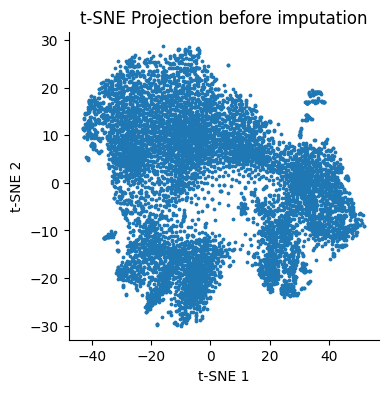

In [16]:
plt.scatter(data_tsne[:,0],data_tsne[:,1],s=3)
plt.title('t-SNE Projection before imputation')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

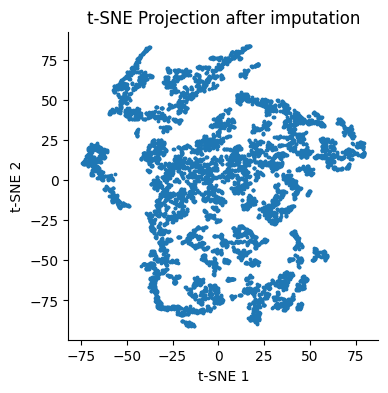

In [17]:
plt.scatter(data_magic_tsne[:,0],data_magic_tsne[:,1],s=3)
plt.title('t-SNE Projection after imputation')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

# Task 4: Dimension

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca =pca.fit_transform(data_log)

import umap
reducer =  umap.UMAP(n_neighbors=5)

data_umap = reducer.fit_transform(data_log)


# Task 5: Clustering 

In [19]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10)
kmeans_labels = kmeans.fit_predict(data_umap)

from sklearn.cluster import AgglomerativeClustering

model =AgglomerativeClustering(n_clusters =10, metric = 'euclidean', linkage='ward')

hierarchical_labels = model.fit_predict(data_umap)

# Task 6: ARI

In [25]:
from sklearn.metrics import adjusted_rand_score
import pandas as pd

ground_truth = pd.read_csv("data/data3_embryo_cortex/sample_cluster_ref_filtered.txt", sep=' ', header=None, index_col=0)


ground_truth.index = ground_truth.index.astype(str)
filtered_data.index = filtered_data.index.astype(str)
print(ground_truth.head())
filter_truth = ground_truth[ground_truth.index.isin(filtered_data.index)]

truth_labels = filter_truth.iloc[:, 0].values.flatten()

ari_kmeans = adjusted_rand_score(truth_labels, kmeans_labels)
ari_hierarchical = adjusted_rand_score(truth_labels, hierarchical_labels)

ari_kmeans, ari_hierarchical


ground_truth 的形状: (7601, 1)
ground_truth 的前几行:
                                   1
0                                   
e14.WT10_AAAAATCTCTCC            RG1
e14.WT10_AAAACACATTCC      LayerV-VI
e14.WT10_AAAACCGTGGAT      LayerV-VI
e14.WT10_AAAACGCGCCGA      LayerV-VI
e14.WT10_AAAATGGACTCA  Striatal_inh2


(0.3384487409938317, 0.3289003480647635)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans, AgglomerativeClustering
import umap
import pandas as pd
import matplotlib.pyplot as plt

import palantir

from sklearn.preprocessing import MinMaxScaler, StandardScaler



print("Min-Max Scaling:")
data_minmax

def generate_data_log(data):
    fig, ax = palantir.plot.plot_molecules_per_cell_and_gene(data.T)
    filtered_data = palantir.preprocess.filter_counts_data(data.T, cell_min_molecules=1000, genes_min_cells=10)
    scaler_minmax = MinMaxScaler()
    data_minmax= pd.DataFrame(scaler_minmax.fit_transform(filtered_data), columns=filtered_data.columns)
    print("Min-Max Scaling:",data_minmax)
    
    scaler_zscore = StandardScaler()
    data_zscore = pd.DataFrame(scaler_zscore.fit_transform(filtered_data),columns=filtered_data.columns)
    print("\nZ-Score Normalization:",data_zscore)
    data_log = np.log(filtered_data+1)
    print("Log-transformed Data:",data_log)
    return data_log



def clustering_pipeline(data, truth_path, n_clusters=10, umap_neighbors=5):
    """
    Run the entire clustering pipeline: dimensionality reduction, clustering, and ARI evaluation.
    
    Parameters:
    - data: DataFrame or numpy array, the input data for clustering.
    - truth_path: str, path to the ground truth labels file.
    - n_clusters: int, number of clusters for clustering algorithms.
    - umap_neighbors: int, number of neighbors for UMAP reduction.
    
    Returns:
    - result: dict, contains ARI scores and cluster labels.
    """
    # Step 1: Dimensionality reduction
    pca = PCA(n_components=2)
    data_pca = pca.fit_transform(data)
    
    reducer = umap.UMAP(n_neighbors=umap_neighbors)
    data_umap = reducer.fit_transform(data)
    
    # Step 2: Clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(data_umap)
    
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
    hierarchical_labels = hierarchical.fit_predict(data_umap)
    
    # Step 3: Load ground truth labels
    ground_truth = pd.read_csv(truth_path, sep='\t', header=None, index_col=0)
    ground_truth.index = ground_truth.index.astype(str)
    
    # Filter for matching indices
    data_indices = [str(idx) for idx in range(data.shape[0])]
    filtered_truth = ground_truth[ground_truth.index.isin(data_indices)]
    truth_labels = filtered_truth.iloc[:, 0].values.flatten()
    
    # Step 4: ARI evaluation
    ari_kmeans = adjusted_rand_score(truth_labels, kmeans_labels)
    ari_hierarchical = adjusted_rand_score(truth_labels, hierarchical_labels)
    
    # Step 5: Visualization (optional)
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(data_umap[:, 0], data_umap[:, 1], c=kmeans_labels, cmap='viridis', s=5)
    plt.title("KMeans Clustering")
    plt.xlabel("UMAP 1")
    plt.ylabel("UMAP 2")
    
    plt.subplot(1, 2, 2)
    plt.scatter(data_umap[:, 0], data_umap[:, 1], c=hierarchical_labels, cmap='viridis', s=5)
    plt.title("Hierarchical Clustering")
    plt.xlabel("UMAP 1")
    plt.ylabel("UMAP 2")
    
    plt.tight_layout()
    plt.show()
    
    # Return results
    return {
        "ari_kmeans": ari_kmeans,
        "ari_hierarchical": ari_hierarchical,
        "kmeans_labels": kmeans_labels,
        "hierarchical_labels": hierarchical_labels
    }

# Usage example:
# result = clustering_pipeline(data_log, "path/to/ground_truth.txt", n_clusters=10, umap_neighbors=5)
